In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report


In [48]:
# Define paths to your dataset directories
train_dir = '/kaggle/input/undersample-majority/undersample_split/1.train'  # Replace with the actual path to your training data
val_dir = '/kaggle/input/undersample-majority/undersample_split/2.val'  # Replace with the actual path to your validation data

# Image parameters
img_height = 64  # Image height
img_width = 64   # Image width
batch_size = 32

# Set up ImageDataGenerators to load and preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories and apply transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use 'categorical' if one-hot encoded
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use 'categorical' if one-hot encoded
)


Found 467 images belonging to 7 classes.
Found 100 images belonging to 7 classes.


In [49]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # For a 7-class problem (adjust based on your dataset)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if one-hot encoding
              metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 952ms/step - accuracy: 0.1686 - loss: 1.9483 - val_accuracy: 0.1500 - val_loss: 1.9066
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 713ms/step - accuracy: 0.1872 - loss: 1.8874 - val_accuracy: 0.1700 - val_loss: 1.8657
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 665ms/step - accuracy: 0.3231 - loss: 1.7625 - val_accuracy: 0.2600 - val_loss: 1.8058
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 731ms/step - accuracy: 0.3317 - loss: 1.7508 - val_accuracy: 0.3500 - val_loss: 1.6937
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 712ms/step - accuracy: 0.3339 - loss: 1.6500 - val_accuracy: 0.4600 - val_loss: 1.5497
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 693ms/step - accuracy: 0.4577 - loss: 1.4793 - val_accuracy: 0.3700 - val_loss: 1.5224
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 762ms/step - accuracy: 0.4611 - loss: 1.4060 - val_accuracy: 0.4500 - val_loss: 1.4055
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 732ms/step - accuracy: 0.4798 - loss: 1.3798 - val_accuracy: 0.480

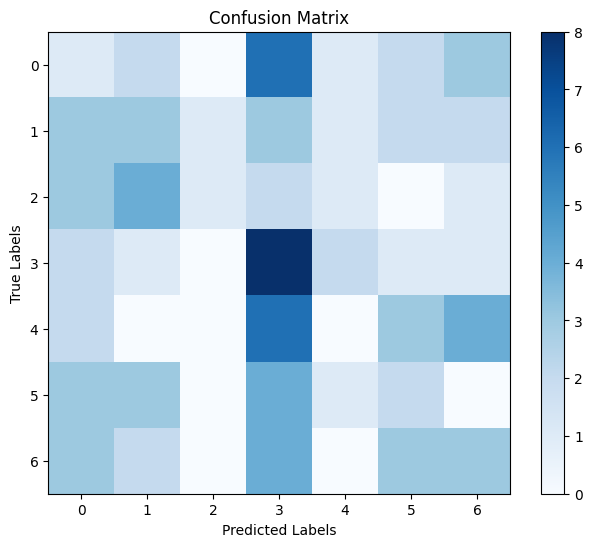

Learning Rate: 0.001
Training Rate: 0.5546038746833801


In [50]:
# Train the model using data generators
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model using validation data
y_pred = np.argmax(model.predict(val_generator), axis=-1)
y_true = val_generator.classes  # True labels from the validation generator

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=val_generator.class_indices)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Sensitivity (Recall for each class)
sensitivity = recall_score(y_true, y_pred, average=None)

# Specificity (1 - False Positive Rate for each class)
specificity = 1 - (conf_matrix.sum(axis=0) - np.diagonal(conf_matrix)) / conf_matrix.sum(axis=0)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity (per class): {sensitivity}")
print(f"Specificity (per class): {specificity}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(train_generator.num_classes), np.arange(train_generator.num_classes))
plt.yticks(np.arange(train_generator.num_classes), np.arange(train_generator.num_classes))
plt.show()

# Learning rate and training rate
learning_rate = 0.001  # The learning rate you defined in the optimizer
training_rate = history.history['accuracy'][-1]  # Last epoch training accuracy
print(f"Learning Rate: {learning_rate}")
print(f"Training Rate: {training_rate}")
